In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib

from stratx.partdep import *
from rfpimp import pd_importances, plot_importances

In [17]:
def synthetic_poly_data(n, p):
    df = pd.DataFrame()
    # Add independent x variables in [0.0, 1.0)
    coeff = np.random.random_sample(size=p)*5 # get p random coefficients
#     coeff = np.array([1,3,5])
    # coeff = np.array([5,10])
    for i in range(p):
        df[f'x{i+1}'] = np.round(np.random.random_sample(size=n)+2,1) # shift x_i to right 2
    #df['x3'] = df['x1']+np.random.random_sample(size=n)*2 # copy x1 + noise
    # multiply coefficients x each column (var) and sum along columns
    yintercept = 10
    df['y'] = np.sum( [coeff[i]*df[f'x{i+1}'] for i in range(p)], axis=0 ) + yintercept
    #TODO add noise
    terms = [f"{coeff[i]:.1f}x_{i+1}" for i in range(p)] + [f"{yintercept:.0f}"]
    eqn = "y = " + ' + '.join(terms)
    return df, coeff, eqn

In [24]:
p=3
df, coeff, eqn = synthetic_poly_data(5000,p)
print(eqn)
X = df.drop('y', axis=1)
y = df['y']

I = pd_importances(X, y)
I

y = 4.7x_1 + 0.6x_2 + 1.6x_3 + 10


,Importance,Variation
Feature,,
x1,0.672089,4.682037
x3,0.234661,1.634743
x2,0.093250,0.649615


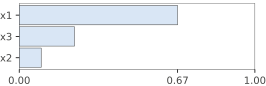

In [25]:
plot_importances(I, imp_range=(0,1.0))